I. Realice una simulación del siguiente problema:
En una clase de modelación y simulación hay 1,000,000 estudiantes distribuidos de la siguiente manera:
- 400,000 son mujeres
- 300,000 personas usan lentes
- 150,000 varones usan lentes
Si se selecciona al azar un estudiante, ¿cuál es la probabilidad que sea mujer y use gafas?
Si se selecciona a alguien que no usa lentes, ¿cuál es la probabilidad que sea varón?
Nota: La generación de variables aleatorias debe realizarse con los procedimientos vistos en clase. Es decir, utilizar el método de transformada inversa o aceptación y rechazo.

In [20]:
import random

# Definir las probabilidades de género y uso de lentes
probabilidad_mujer = 400000 / 1000000
probabilidad_lentes = 300000 / 1000000
probabilidad_varon_lentes = 150000 / 1000000

# Calcular la probabilidad de ser mujer y usar lentes
probabilidad_mujer_lentes = probabilidad_mujer * probabilidad_lentes

# Calcular la probabilidad de ser varón y no usar lentes
probabilidad_varon_no_lentes = (1 - probabilidad_mujer) * (1 - probabilidad_lentes)

# Número de simulaciones
num_simulaciones = 1000000

# Inicializar contadores
contador_mujer_lentes = 0
contador_varon_no_lentes = 0

# Realizar simulaciones
for _ in range(num_simulaciones):
    # Generar una variable aleatoria para el género
    genero = "Mujer" if random.random() < probabilidad_mujer else "Varon"
    
    # Generar una variable aleatoria para el uso de lentes
    usa_lentes = random.random() < probabilidad_lentes
    
    # Calcular la probabilidad de ser mujer y usar lentes
    if genero == "Mujer" and usa_lentes:
        contador_mujer_lentes += 1
    
    # Calcular la probabilidad de ser varón y no usar lentes
    if genero == "Varon" and not usa_lentes:
        contador_varon_no_lentes += 1

# Calcular las probabilidades simuladas
probabilidad_simulada_mujer_lentes = contador_mujer_lentes / num_simulaciones
probabilidad_simulada_varon_no_lentes = contador_varon_no_lentes / num_simulaciones

# Imprimir resultados
print("Probabilidad simulada de ser mujer y usar lentes:", probabilidad_simulada_mujer_lentes)
print("Probabilidad simulada de ser varón y no usar lentes:", probabilidad_simulada_varon_no_lentes)


Probabilidad simulada de ser mujer y usar lentes: 0.119393
Probabilidad simulada de ser varón y no usar lentes: 0.420374


I. Realice la siguiente simulación:


a) Seleccione una distribución de probabilidad discreta de su preferencia, especificando valores numéricos para sus parámetros. Genere n=1,000,000 valores independientes al azar 
 de esta distribución y calcule las medias aritméticas parciales Sn= (1/n)(sumatoria desde i=1 hasta n)(Xi)
, n=1,2,..., 1,000,000.
Grafique la función n-> Sn
 uniendo los valores con una línea recta. Sea 
 la media de la distribución. Trace en la misma gráfica la función constante μ
 y verifique gráficamente que la función n-> Sn
 oscila  y se aproxima al valor μ
 conforme n crece. 


b) Realice lo mismo que el inciso 

a), pero con una distribución continua de su preferencia.
Nota: La generación de variables aleatorias debe realizarse con los procedimientos vistos en clase. Es decir, utilizar el método de transformada inversa o aceptación y rechazo.
En el caso II.

b), favor no utilizar la distribución uniforme.

### Simulación para una distribución discreta (Binomial)
##### n = 10, p = 0.5    np=5

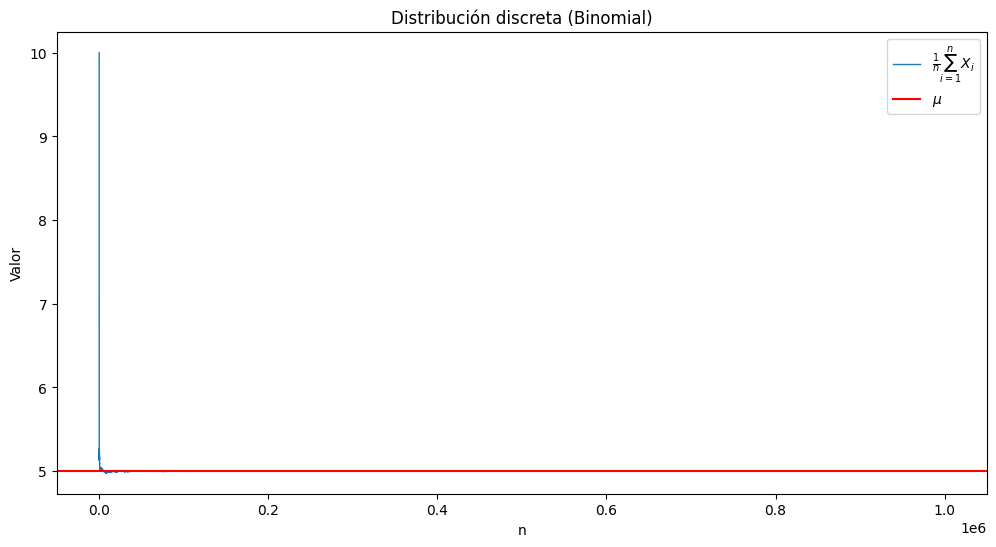

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución binomial
n_trials = 10
p = 0.5
mu = n_trials * p

# Generar n=1,000,000 valores usando el método de transformada inversa
N = 1000000
U = np.random.rand(N)
binomial_values = np.floor(np.random.binomial(n_trials, p, N))

# Calcular medias aritméticas parciales
S_n = np.cumsum(binomial_values) / np.arange(1, N + 1)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(S_n, label=r'$\frac{1}{n}\sum_{i=1}^{n}X_i$', lw=1)
plt.axhline(y=mu, color='r', linestyle='-', label=r'$\mu$')
plt.xlabel('n')
plt.ylabel('Valor')
plt.legend()
plt.title('Distribución discreta (Binomial)')
plt.show()


### Simulación para una distribución continua (Exponencial)
#####  λ = 2
##### μ = 1/λ = 0.5

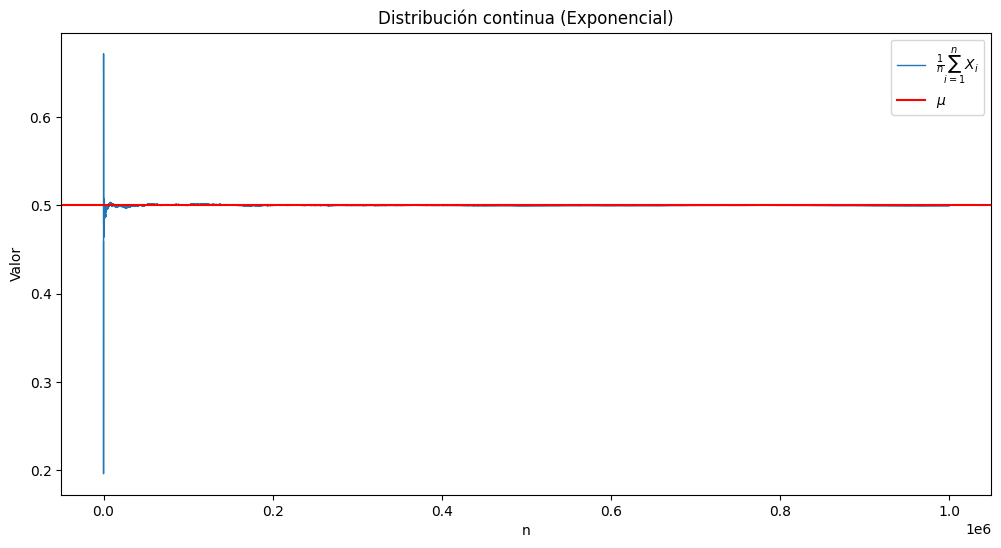

In [22]:
# Parámetros de la distribución exponencial
lambda_exp = 2
mu_exp = 1 / lambda_exp

# Generar n=1,000,000 valores usando el método de transformada inversa
U_exp = np.random.rand(N)
exponential_values = -np.log(1 - U_exp) / lambda_exp

# Calcular medias aritméticas parciales
S_n_exp = np.cumsum(exponential_values) / np.arange(1, N + 1)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(S_n_exp, label=r'$\frac{1}{n}\sum_{i=1}^{n}X_i$', lw=1)
plt.axhline(y=mu_exp, color='r', linestyle='-', label=r'$\mu$')
plt.xlabel('n')
plt.ylabel('Valor')
plt.legend()
plt.title('Distribución continua (Exponencial)')
plt.show()


En ambas distribuciones, tanto discreta como continua, se observar que el valor de Sn se aproxima al valor de μ a medida que el número de muestras n aumenta. Esto es una confirmación gráfica de la Ley de los Grandes Números, que establece que la media aritmética de una muestra grande de una variable aleatoria se aproxima a la media de la distribución subyacente.

3. Elabore un histograma de estos N valores, trazando en la misma gráfica, la función de densidad normal estándar N(0,1). Utilice un tamaño adecuado para la base de los rectángulos.

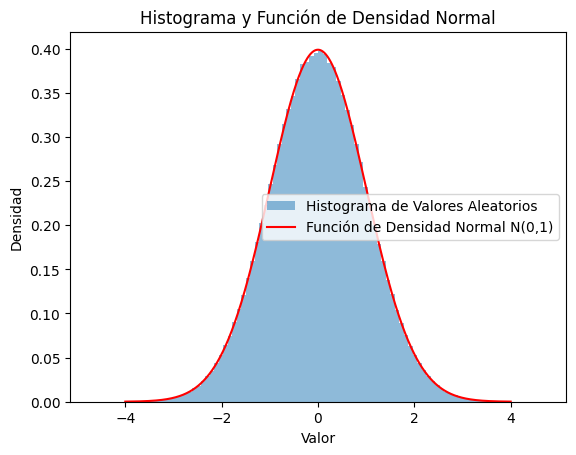

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

# Número de simulaciones
num_simulaciones = 1000000

# Generación de valores aleatorios con método de transformada inversa
valores_aleatorios = np.random.normal(0, 1, num_simulaciones)

# Crear un histograma de los valores aleatorios
plt.hist(valores_aleatorios, bins=100, density=True, alpha=0.5, label='Histograma de Valores Aleatorios')

# Crear una función de densidad normal estándar N(0,1)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)  # Utiliza norm.pdf para obtener la densidad de la distribución normal
plt.plot(x, y, 'r', label='Función de Densidad Normal N(0,1)')

# Configurar la leyenda
plt.legend()

# Mostrar el histograma y la función de densidad normal en la misma gráfica
plt.title('Histograma y Función de Densidad Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


## Histograma y Función de Densidad Normal:


- El histograma muestra la distribución de los valores aleatorios generados. Tienes razón en notar que tiene una forma de pico con el valor máximo en x = 0 y y = 0.40. Esto indica que la mayoría de los valores generados se encuentran cerca de cero, lo que es consistente con una distribución normal estándar, ya que N(0,1) tiene su media en cero. El pico y la simetría en torno a cero son características típicas de una distribución normal.
- A medida que te alejas de x = 0 en ambas direcciones (hacia x = -4 y x = 4), la densidad disminuye abruptamente. Esto también es característico de una distribución normal, ya que la probabilidad de observar valores muy alejados de la media disminuye rápidamente.

4. Elabore una gráfica de la frecuencia relativa acumulada (función de distribución empírica) de los N valores uniendo los puntos con una línea recta y en la misma gráfica dibuje la función de distribución acumulada de N(0,1).

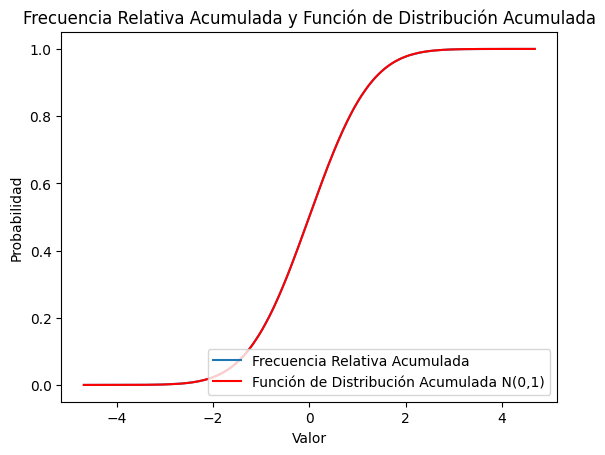

In [24]:
# Calcular la frecuencia relativa acumulada de los valores aleatorios
valores_ordenados = np.sort(valores_aleatorios)
frecuencia_relativa_acumulada = np.arange(1, num_simulaciones + 1) / num_simulaciones

# Crear una función de distribución acumulada de N(0,1) usando la función de distribución acumulada de scipy.stats.norm
funcion_distribucion_normal = norm.cdf(valores_ordenados, loc=0, scale=1)

# Crear una gráfica de la frecuencia relativa acumulada y la función de distribución acumulada
plt.plot(valores_ordenados, frecuencia_relativa_acumulada, label='Frecuencia Relativa Acumulada')
plt.plot(valores_ordenados, funcion_distribucion_normal, 'r', label='Función de Distribución Acumulada N(0,1)')

# Configurar la leyenda
plt.legend()

# Mostrar la gráfica
plt.title('Frecuencia Relativa Acumulada y Función de Distribución Acumulada')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.show()

## Frecuencia Relativa Acumulada y Función de Distribución Acumulada:

- En la gráfica de frecuencia relativa acumulada, observas que la probabilidad de que los valores estén en el rango de x = -4 a x = -2 es cero, lo que significa que no se observaron valores en ese rango en las simulaciones. Esto es consistente con la cola izquierda de la distribución normal, donde los valores son muy improbables lejos de la media.
- A partir de x = -2, la frecuencia relativa acumulada comienza a crecer exponencialmente. Esto indica que la probabilidad de que los valores estén en el rango de x = -2 a x = 2 es significativamente alta, lo que nuevamente es consistente con la distribución normal estándar, ya que la mayoría de los valores se concentran cerca de la media.
- La frecuencia relativa acumulada alcanza su punto máximo de y = 1 en x = 2 y se mantiene en 1 en x = 4. Esto significa que el 100% de los valores generados caen dentro de ese rango. Esto también es consistente con la distribución normal, ya que la distribución normal estándar tiene un alcance infinito, pero la probabilidad de que los valores estén más allá de 4 desviaciones estándar de la media es prácticamente cero.